/Users/xiaoguang_guo@mines.edu/anaconda3/envs/python3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


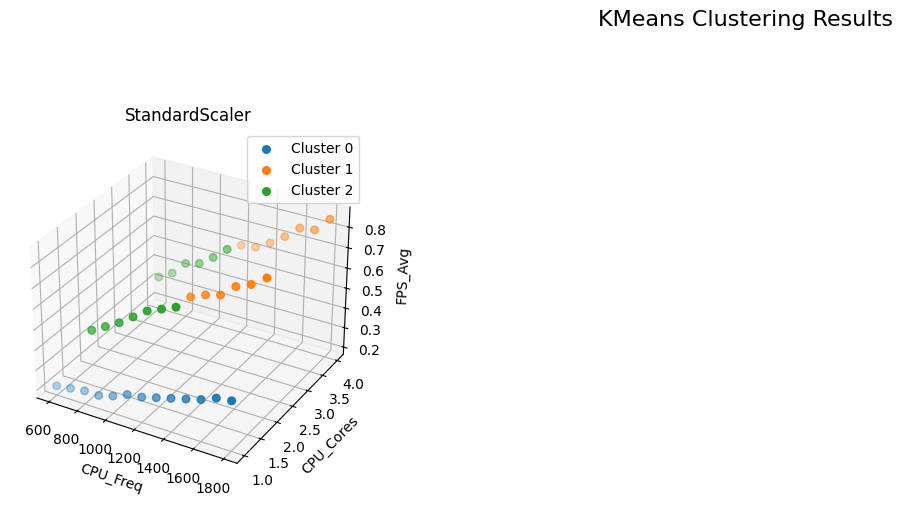

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer, Normalizer
from sklearn.cluster import KMeans

# Load the data
df = pd.read_csv('pose_estimation_results_20230920_221639.csv')

# Define scalers
scalers = {
    "StandardScaler": StandardScaler(),
    # "MinMaxScaler": MinMaxScaler(),
    # "MaxAbsScaler": MaxAbsScaler(),
    # "RobustScaler": RobustScaler(),
    # "QuantileTransformer": QuantileTransformer(output_distribution='uniform'),
    # "PowerTransformer": PowerTransformer(method='yeo-johnson'),
    # "Normalizer": Normalizer()
}

# Scale the data and perform KMeans clustering
scaled_data_dict = {}
clustered_data_dict = {}
n_clusters = 3  # Number of clusters

for name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(df[['CPU_Freq', 'CPU_Cores', 'FPS_Avg']])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Add the cluster labels back to the scaled data and store it
    scaled_data = pd.DataFrame(scaled_data, columns=['CPU_Freq', 'CPU_Cores', 'FPS_Avg'])
    scaled_data['Cluster'] = clusters
    scaled_data_dict[name] = scaled_data
    
    # Add cluster labels to the original DataFrame and store it
    df[f'Cluster_{name}'] = clusters
    clustered_data_dict[name] = df.copy()

# Save the DataFrame with the new cluster labels to a new CSV file
df.to_csv('pose_estimation_with_clusters.csv', index=False)
# Drop FPS_Avg from DataFrame before saving it
df.drop(columns=['FPS_Avg'], inplace=True)

# Save the DataFrame with the new cluster labels to a new CSV file
df.to_csv('pose_estimation_with_clusters_without_fps.csv', index=False)

# Visualize the clusters
fig = plt.figure(figsize=(15, 10))

subplot_positions = [1, 2, 3, 5, 6, 7, 8]
for idx, (name, clustered_data) in enumerate(clustered_data_dict.items()):
    ax = fig.add_subplot(2, 4, subplot_positions[idx], projection='3d')
    for c in range(n_clusters):
        ax.scatter(clustered_data['CPU_Freq'][clustered_data[f'Cluster_{name}'] == c], 
                   clustered_data['CPU_Cores'][clustered_data[f'Cluster_{name}'] == c], 
                   clustered_data['FPS_Avg'][clustered_data[f'Cluster_{name}'] == c], 
                   s=30, label=f'Cluster {c}')
    ax.set_title(name)
    ax.set_xlabel('CPU_Freq')
    ax.set_ylabel('CPU_Cores')
    ax.set_zlabel('FPS_Avg')
    ax.legend()

plt.suptitle("KMeans Clustering Results", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Load the Data
df = pd.read_csv('pose_estimation_with_clusters_without_fps.csv')

# Step 2: Data Preprocessing (assume no missing or inconsistent data for this example)

# Step 3: Feature Selection
features = df[['CPU_Freq', 'CPU_Cores']]  # Selecting CPU_Freq and CPU_Cores as features
labels = df['Cluster_StandardScaler']  # Assuming 'Cluster' is the column with cluster labels

# Step 4: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 5: Model Selection
lin_reg = LinearRegression()

# Step 6: Model Training
lin_reg.fit(X_train, y_train)

# Step 7: Model Evaluation (Optional for formula extraction)
y_pred = lin_reg.predict(X_test)

# Calculate the loss (Mean Squared Error)
loss = mean_squared_error(y_test, y_pred)

print(f"The Mean Squared Error (MSE) is: {loss}")

# Coefficients A and B
A, B = lin_reg.coef_
C = lin_reg.intercept_

print(f"The formula is: {A} * CPU_Freq + {B} * CPU_Cores + {C} = Cluster")

# Step 8: Use the formula for prediction (Optional)
y_pred_formula = A * X_test['CPU_Freq'] + B * X_test['CPU_Cores'] + C


The Mean Squared Error (MSE) is: 0.15854813422417613
The formula is: -0.0007235598835011893 * CPU_Freq + 0.4307232263945398 * CPU_Cores + 0.9000088930389735 = Cluster


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Step 1: Load the Data
df = pd.read_csv('pose_estimation_with_clusters_without_fps.csv')

# Step 2: Data Preprocessing (assume no missing or inconsistent data for this example)

# Step 3: Feature Selection
features = df[['CPU_Freq', 'CPU_Cores']]  # Selecting CPU_Freq and CPU_Cores as features
labels = df['Cluster_StandardScaler']  # Assuming 'Cluster' is the column with cluster labels

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a DataFrame for the scaled features
df_scaled = pd.DataFrame(features_scaled, columns=['CPU_Freq', 'CPU_Cores'])

# Optionally, you can add the cluster labels back into the DataFrame
df_scaled['Cluster_StandardScaler'] = df['Cluster_StandardScaler']

# Show the standardized data
print(df_scaled.head())

# Step 4: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Step 5: Model Selection
lin_reg = LinearRegression()

# Step 6: Model Training
lin_reg.fit(X_train, y_train)

# Step 7: Model Evaluation (Optional for formula extraction)
y_pred = lin_reg.predict(X_test)

# Calculate the loss (Mean Squared Error)
loss = mean_squared_error(y_test, y_pred)

print(f"The Mean Squared Error (MSE) is: {loss}")

# Coefficients A and B
A, B = lin_reg.coef_
C = lin_reg.intercept_

print(f"The formula is: {A} * (Standardized CPU_Freq) + {B} * (Standardized CPU_Cores) + {C} = Cluster")



   CPU_Freq  CPU_Cores  Cluster_StandardScaler
0  1.603567  -1.069045                       0
1  1.336306  -1.069045                       0
2  1.069045  -1.069045                       0
3  0.801784  -1.069045                       0
4  0.534522  -1.069045                       0
The Mean Squared Error (MSE) is: 0.15854813422417602
The formula is: -0.27073131828755204 * (Standardized CPU_Freq) + 0.5372062472314113 * (Standardized CPU_Cores) + 1.0367578944248057 = Cluster
